In [1]:
import numpy as np
import pandas as pd

from plotnine import *

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('politeness_data.csv')

In [3]:
data

,subject,gender,scenario,attitude,frequency
0,F1,F,1,pol,213.3
1,F1,F,1,inf,204.5
2,F1,F,2,pol,285.1
3,F1,F,2,inf,259.7
4,F1,F,3,pol,203.9
...,...,...,...,...,...
79,M3,M,5,inf,156.5
80,M3,M,6,pol,146.7
81,M3,M,6,inf,158.0
82,M3,M,7,inf,161.1


In [4]:
data.rename(columns={'attitude':'condition', 'frequency':'pitch'}, inplace=True)

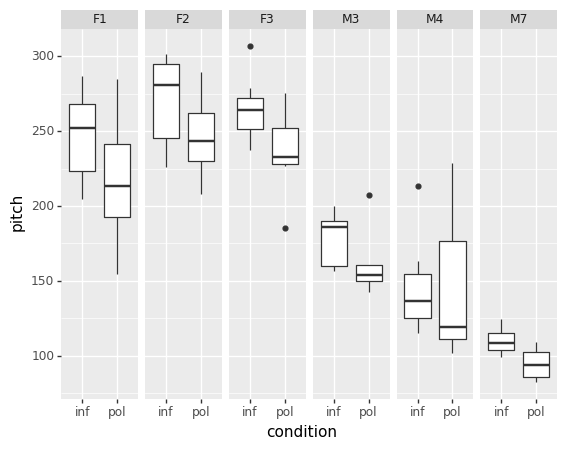

<ggplot: (7021120474)>

In [71]:
(
    ggplot(data=data)
        + geom_boxplot(aes(x='condition', y='pitch'))
         + facet_grid(facets = '~ subject')
)

We start with a simple model:

$$ \mathrm{pitch} = \mathrm{int} + \mathrm{politeness} + \mathrm{sex} + (1|subject) + \varepsilon $$

In [10]:
data = data.dropna()

In [37]:
md = smf.mixedlm("pitch ~ subject", data, groups=data["subject"])
mdf = md.fit()
mdf.summary()

In [23]:
pitch_by_subject = data.groupby('subject')['pitch'].mean()
pitch_by_subject
mdf.params['Intercept'] + mdf.params['subject[T.F2]']

subject
F1    232.035714
F2    258.185714
F3    250.735714
M3    168.978571
M4    145.976923
M7    102.178571
Name: pitch, dtype: float64

In [50]:
md = smf.mixedlm("pitch ~ condition + C(gender, Helmert)", data, groups=data["subject"])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                  MixedLM     Dependent Variable:     pitch    
No. Observations:       83          Method:                 REML     
No. Groups:             6           Scale:                  850.9501 
Min. group size:        13          Log-Likelihood:         -394.0651
Max. group size:        14          Converged:              Yes      
Mean group size:        13.8                                         
---------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept               202.588   10.996 18.424 0.000 181.037 224.139
condition[T.pol]        -19.410    6.407 -3.030 0.002 -31.966  -6.853
C(gender, Helmert)[H.M] -54.102   10.531 -5.137 0.000 -74.743 -33.462
Group Var               603.873   16.530                             
=====================================================================

"""

In [52]:
deviance = -2*mdf.llf
deviance

788.1302186731671

In [53]:
p = 4 # number of parameters = 3 (fixed) + 1 (random)
deviance + 2*(p+1) # total parameters = 4 + 1 for estimated residual variance

798.1302186731671

In [54]:
data_by_subject = data.groupby('subject')['pitch'].mean()

In [67]:
data_by_subject.to_frame().reset_index()

,subject,pitch
0,F1,232.035714
1,F2,258.185714
2,F3,250.735714
3,M3,168.978571
4,M4,145.976923
5,M7,102.178571


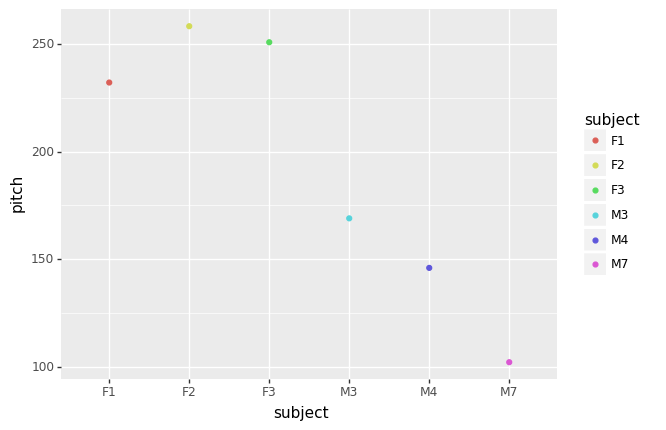

<ggplot: (7021132699)>

In [69]:
(
    ggplot(data=data_by_subject.to_frame().reset_index())
     + geom_point(aes(x='subject', y='pitch', color='subject'))
)